## **Introduction**
#### In this notebook, we will be discussing the different ways of identifying and handling missing values in a dataset.

## **What are missing values and why do they matter?**

##### Missing values as the names implies, are simply values that aren't defined or cannot be found in the dataset, denoted by 'NaN', 'nan' which means 'Not a Number', or null
#### Eg:

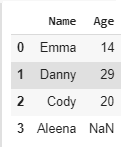
##### As we can see, Aleena's age is 'nan which is quite impossible, because, all humans have an age


##### Missing values can be caused by a lot of factors, including but not limited to;
##### - Human error when computing the data
##### - Respondent refusing to disclose certain information eg Age, Source of income, Salary etc..
##### - Data corruption


##### Handling missing values is an important part of data preprocessing, because, a lot of machine learning algorithms don't know how to handle them and most of the time an error of this nature will be displayed; **ValueError: Input contains NaN, infinity or a value too large for dtype('float64').**

##### There are various ways of handling missing values and they can be classified into; 
##### - Deleting
##### - Imputing

# Identifying Missing values 

In [144]:
import pandas as pd
import sklearn
import numpy as np

data = pd.read_csv('train.csv')
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### We use 'isnull()' or 'isna()' to check if there are missing values in a dataset.
##### This returns; 
##### - 'True' if a missing value is present and, 
##### - False if there is no missing value

In [145]:
# Checks if there are null values present in the entire dataset
data.isnull().head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


##### We use data[column].isnull().any() to check if there are missing values in a specific column.
##### This simply checks through that particular column and returns 'True' if there is any missing value, otherwise it returns 'False'

In [146]:
data['LotArea'].isnull().any()
# The column LotArea doesn't have any missing value

False

# Deleting / Dropping
##### In this approach, we will be dropping either the columns with missing values.

##### This is one of the least advisiable methods,because, it causes the model to lose a lot of vital information.
##### A good example is the 'Electrical' feature, it has just one missing value, therefore deleting it can make the model lose some information.
##### On the otherhand, a feature like 'MiscFeature' which has 1,406 missing values would most likely be better off dropped, because the model will not learn anything useful from the feature
##### It is better to delete any feature that has above 30% missing value

#### We will be dropping the categorical variables since it is outside the scope if this class

In [147]:
# To get a list of Numerical and Categorical Features
numerical_features = [col for col in data.columns if data[col].dtypes != object]
categorical_features = [col for col in data.columns if data[col].dtypes == object]

data.drop(categorical_features, inplace=True, axis=1)

### Let's see the amount of missing values in each columns in the dataset

In [148]:
data.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [149]:
for col in data.columns:
    if data[col].isnull().any():
        percent_missing = data[col].isnull().sum() /(len(data[col])) *100 # Amount of missing value / Total length of dataset * 100
        print(f'{col}: {round(percent_missing, 2)}%')

LotFrontage: 17.74%
MasVnrArea: 0.55%
GarageYrBlt: 5.55%


#### Let us get the list of numerical features that has missing values


In [150]:
features_with_missing = [columns for columns in data.columns if data[columns].isnull().any()]
features_with_missing

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [151]:
data.shape # We have currently have 38 features in our dataset. And the length of our dataset is 1460

(1460, 38)

In [152]:
# This simply deletes all columns that contains missing values in the dataset
dropped_data = data.drop(features_with_missing, axis=1)

print(dropped_data.isna().any())
dropped_data.head(3)

Id               False
MSSubClass       False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500


##### As we can see, after dropping the features with missing values we are now left with 35 feature out of 38, some potentially useful information could have been lost in the process

# Imputing / Filling
## Filling the missing numerical features
<!-- ##### In this approach we will be filling the numerical data with either of the following; 'Mean', 'Median', while the categorical features will be filled with the most occuring value.

##### When filling the missing values with mean/median, we will be getting somewhat similar values, therefore it's best to experiment with both to see which one works best with the data -->

### Filling with Zero's
##### In some cases, we need to fill the missing values with 0's
##### For example, a garage feature like 'GarageYrBlt' has 81 missing values which could signify that 81 respondents do not have a garage in their building, so instead of filling with mean or median, it will be more reasonable to fill them with '0'

##### Cases like this are very common and can be handled well after proper data analysis

In [153]:
Missing_garage_features = ['GarageYrBlt']

for val in Missing_garage_features:
    data[val] = data[val].fillna(0)

### Filling with median/mean

##### We do this by filling all missing value in a column by it's mean/median value, because, they properly describe/summerize the column in consideration.
##### For example, to fill the missing values in 'LotFrontage' we have to;
##### - Get the mean value: **LotFrontage_mean =  data['LotFrontage'].mean()**
##### - Fill the missing values with the mean value we got: **data['LotFrontage'].fillna(LotFrontage_mean)**

##### Same method can be applied for filling missing values with the median

In [154]:
print('Missing values in LotFrontage:' ,data['LotFrontage'].isna().sum())

LotFrontage_mean =  data['LotFrontage'].mean()
data['LotFrontage'] = data['LotFrontage'].fillna(LotFrontage_mean)
print('Missing values in LotFrontage after filing:' ,data['LotFrontage'].isna().sum())

Missing values in LotFrontage: 259
Missing values in LotFrontage after filing: 0


In [155]:
# DOING THE SAME THING WE DID ABOVE, BUT ON A LARGER SCALE

# For each feature in a list of Numerical Features;
for num_feat in numerical_features:
    
    # If there are missing values present in a particular feature;
    if data[num_feat].isna().any():
        
        # Fill all missing value with the mean of the feature.
        data[num_feat].fillna(data[num_feat].mean(), inplace=True)

# Checking if there are any missing numerical features left
data[numerical_features].isna().any()

Id               False
MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [156]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


#### Time to put these techinique we have learnt into practice

In [157]:
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [158]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

y = train['SalePrice']
test_id = test['Id']

# We will only be needing the numerical variables since we are not dealing with categorical variables in this section
numerical_featues = numerical_features.remove('SalePrice')
train = train[numerical_features]
test = test[numerical_features]

#### Dropping

In [159]:
# DROPPING
train.drop(['Id'],inplace=True, axis=1)
test.drop(['Id'],inplace=True,axis=1)

dropped_train = train.drop(features_with_missing,1)
dropped_test = test.drop(features_with_missing,1)

# Splitting and Training
x_train, x_test, y_train, y_test = train_test_split(dropped_train, y, test_size=0.20)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
pred = model.predict(x_test)

print('Mean Absolute Error: ', mean_absolute_error(pred,y_test))

Mean Absolute Error:  18002.143904109587


### Imputing

In [160]:
# FILLING WITH MEAN

imputed_train = train.copy()
imputed_test = test.copy()

for col in imputed_train.columns:
    if imputed_train[col].isna().any():
        imputed_train[col].fillna(imputed_train[col].mean(), inplace=True)
        
for col in imputed_test.columns:
    if imputed_test[col].isna().any():
        imputed_test[col].fillna(imputed_test[col].mean(), inplace=True)


# Splitting and Training

x_train, x_test, y_train, y_test = train_test_split(imputed_train, y, test_size=0.20)

model.fit(x_train,y_train)

pred = model.predict(x_test)

print('Mean Absolute Error: ', mean_absolute_error(pred,y_test))

Mean Absolute Error:  15125.395308219177


In [161]:
# FILLING WITH MEDIAN

imputed_train = train.copy()
imputed_test = test.copy()

for col in imputed_train.columns:
    if imputed_train[col].isna().any():
        imputed_train[col].fillna(imputed_train[col].median(), inplace=True)
        
for col in imputed_test.columns:
    if imputed_test[col].isna().any():
        imputed_test[col].fillna(imputed_test[col].median(), inplace=True)
        
        
# Splitting and Training
x_train, x_test, y_train, y_test = train_test_split(imputed_train, y, test_size=0.20)

model.fit(x_train,y_train)

pred = model.predict(x_test)

print('Mean Absolute Error: ', mean_absolute_error(pred,y_test))

Mean Absolute Error:  17670.5025456621


#### As  we can see, imputing the missing values improves the performance of the model by a great deal

### Summary;
##### - Only proper data analysis can help you determine the method to use when handling missing values
##### - You only drop a column when the amount of missing values are much, because, they might not provide any meaningful information to the model
##### - We don't have to handle missing values all the time as there are some machine learning models that can handle them, but that is outside the scope of this class

#### Resourses:
##### https://www.kaggle.com/learn/intermediate-machine-learning